In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airpassengers.csv')
df_airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df_airline.shape

(144, 2)

In [4]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df_airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df_airline.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
df_airline.set_index('Month',inplace=True)

In [10]:
df_airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

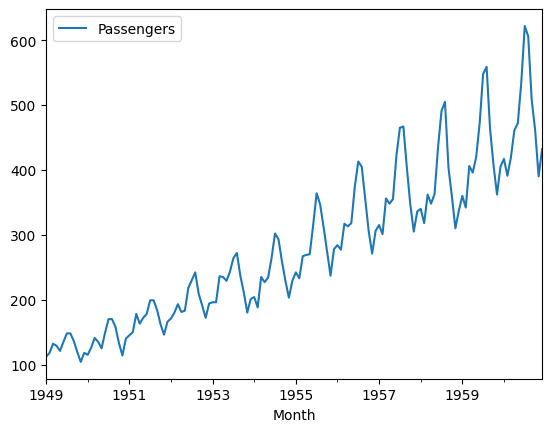

In [11]:
df_airline.plot()

### Step1 : Stationarity of data

Dicky Fuller Test 

In [12]:
from statsmodels.tsa.stattools import adfuller

# it returns p-value >> Hypothesis Testing
# ho >>> Null 
# h1 >>> Alternate

In [13]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# if p >= .05   (Ho) True    ( non stationary)
#   else : fails Ha               (Stationary)

In [14]:
adf_test(df_airline['Passengers'])

ADF Statistics: 0.8153688792060433
p- value: 0.9918802434376409
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Passengers']-df_airline['Passengers'].shift(1)

In [23]:
df_airline

,Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [24]:
df_airline.head()

,Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [18]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699954
p- value: 0.05421329028382609
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers Second Difference'].shift(1)

KeyError: 'Passengers Second Difference'

In [20]:
df_airline

,Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

KeyError: 'Passengers Second Difference'

In [22]:
df_airline

,Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [59]:
df_airline

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


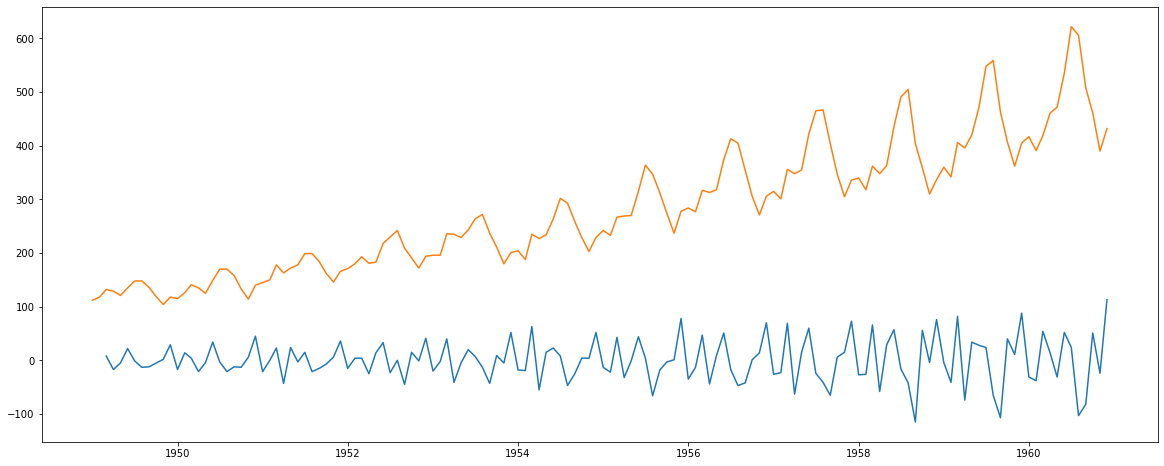

In [56]:
plt.figure(figsize=(20,8))
plt.plot(df_airline['Passengers Second Difference'].dropna())
plt.plot(df_airline['Passengers'])

In [58]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Passengers']-df_airline['Passengers'].shift(12)

In [60]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


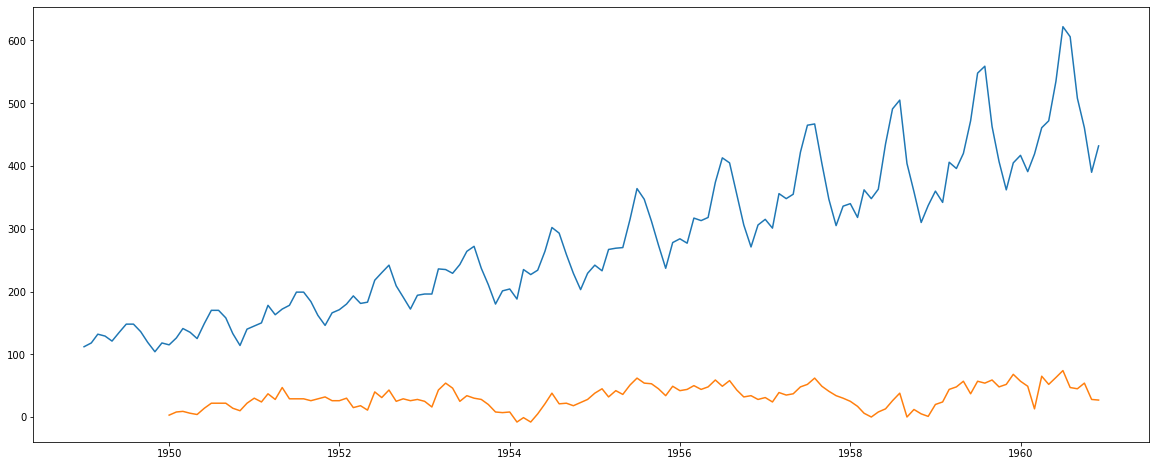

In [61]:
plt.figure(figsize=(20,8))
plt.plot(df_airline['Passengers'])
plt.plot(df_airline['Passengers 12 Difference'].dropna())

In [62]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

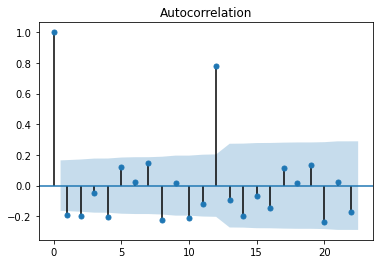

In [63]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

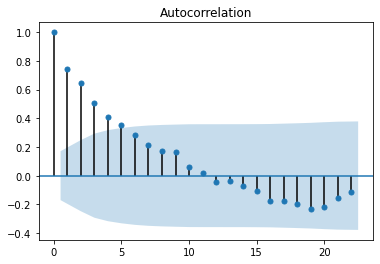

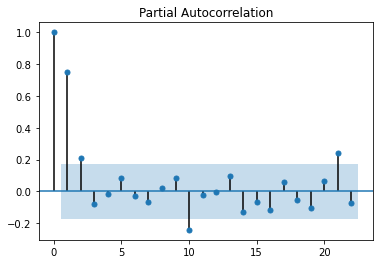

In [64]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [ ]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

In [ ]:
# pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [65]:
### split train and test data
df_airline

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [67]:
from datetime import datetime,timedelta
train_dataset_end= datetime(1955,12,1)
test_dataset_end= datetime(1960,12,31)

In [66]:
train_data=df_airline.iloc[:100]
test_data=df_airline.iloc[100:]


In [73]:
test_data.index[-1]

Timestamp('1960-12-01 00:00:00')

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data

In [74]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [75]:
train_data

,Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1956-12-01,306,35.0,70.0,28.0
1957-01-01,315,9.0,-26.0,31.0
1957-02-01,301,-14.0,-23.0,24.0


In [76]:
model_ARIMA=ARIMA(train_data['Passengers'],order=(5,2,7))

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [77]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [78]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                   98
Model:                 ARIMA(5, 2, 7)   Log Likelihood                -418.765
Method:                       css-mle   S.D. of innovations             15.614
Date:                Sat, 09 Sep 2023   AIC                            865.530
Time:                        16:32:38   BIC                            901.720
Sample:                    03-01-1949   HQIC                           880.168
                         - 04-01-1957                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0176      0.014      1.246      0.216      -0.010       0.045
ar.L1.D2.Passengers     0.6165      0.118      5.208      0.000       0.385       0.849
ar.L2.D2.Passengers    -1.0145      0.040    -25.362      0.000      -1.093      -0.936
ar.L3.D2.Passengers     0.6008      0.131      4.583      0.000       0.344       0.858
ar.L4.D2.Passengers    -0.9489      0.052    -18.201      0.000      -1.051      -0.847
ar.L5.D2.Passengers     0.5830      0.120      4.838      0.000       0.347       0.819
ma.L1.D2.Passengers    -1.5436      0.139    -11.083      0.000      -1.817      -1.271
ma.L2.D2.Passengers     1.2843      0.256      5.024      0.000       0.783       1.785
ma.L3.D2.Passengers    -1.3544      0.291     -4.658      0.000      -1.924      -0.785
ma.L4.D2.Passengers     1.0240      0.348      2.942      0.004       0.342       1.706
ma.L5.D2.Passengers    -0.8508      0.348     -2.448      0.016      -1.532      -0.170
ma.L6.D2.Passengers    -0.0639      0.300     -0.213      0.832      -0.651       0.524
ma.L7.D2.Passengers     0.5134      0.142      3.603      0.001       0.234       0.793
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5010           -0.8846j            1.0167           -0.3320
AR.2           -0.5010           +0.8846j            1.0167            0.3320
AR.3            0.4937           -0.8756j            1.0052           -0.1683
AR.4            0.4937           +0.8756j            1.0052            0.1683
AR.5            1.6424           -0.0000j            1.6424           -0.0000
MA.1            1.0007           -0.0440j            1.0017           -0.0070
MA.2            1.0007           +0.0440j            1.0017            0.0070
MA.3            0.4578           -0.8891j            1.0000           -0.1743
MA.4            0.4578           +0.8891j            1.0000            0.1743
MA.5           -0.4257           -0.9049j            1.0000           -0.3200
MA.6           -0.4257           +0.9049j            1.0000            0.3200
MA.7           -1.9410           -0.0000j            1.9410           -0.5000
-----------------------------------------------------------------------------
"""

In [79]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1957-05-01 00:00:00
1960-12-01 00:00:00


In [80]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
pred

1957-05-01   -10.926507
1957-06-01    50.847034
1957-07-01   -18.731995
1957-08-01   -15.304900
1957-09-01     6.085927
1957-10-01   -27.819178
1957-11-01    13.327143
1957-12-01    43.717831
1958-01-01   -17.956936
1958-02-01   -17.447467
1958-03-01     4.881409
1958-04-01   -23.774280
1958-05-01    12.454346
1958-06-01    40.837656
1958-07-01   -16.523129
1958-08-01   -18.706521
1958-09-01     4.106498
1958-10-01   -19.889103
1958-11-01    11.839742
1958-12-01    38.082431
1959-01-01   -15.262785
1959-02-01   -19.642150
1959-03-01     3.443907
1959-04-01   -16.335045
1959-05-01    11.338805
1959-06-01    35.392641
1959-07-01   -14.194379
1959-08-01   -20.314521
1959-09-01     2.876756
1959-10-01   -13.100353
1959-11-01    10.922591
1959-12-01    32.774707
1960-01-01   -13.296590
1960-02-01   -20.755384
1960-03-01     2.402016
1960-04-01   -10.164844
1960-05-01    10.571058
1960-06-01    30.236530
1960-07-01   -12.547719
1960-08-01   -20.992335
1960-09-01     2.016191
1960-10-01    -7

In [82]:
residuals=test_data['Passengers']-pred

In [84]:
pred

1957-05-01   -10.926507
1957-06-01    50.847034
1957-07-01   -18.731995
1957-08-01   -15.304900
1957-09-01     6.085927
1957-10-01   -27.819178
1957-11-01    13.327143
1957-12-01    43.717831
1958-01-01   -17.956936
1958-02-01   -17.447467
1958-03-01     4.881409
1958-04-01   -23.774280
1958-05-01    12.454346
1958-06-01    40.837656
1958-07-01   -16.523129
1958-08-01   -18.706521
1958-09-01     4.106498
1958-10-01   -19.889103
1958-11-01    11.839742
1958-12-01    38.082431
1959-01-01   -15.262785
1959-02-01   -19.642150
1959-03-01     3.443907
1959-04-01   -16.335045
1959-05-01    11.338805
1959-06-01    35.392641
1959-07-01   -14.194379
1959-08-01   -20.314521
1959-09-01     2.876756
1959-10-01   -13.100353
1959-11-01    10.922591
1959-12-01    32.774707
1960-01-01   -13.296590
1960-02-01   -20.755384
1960-03-01     2.402016
1960-04-01   -10.164844
1960-05-01    10.571058
1960-06-01    30.236530
1960-07-01   -12.547719
1960-08-01   -20.992335
1960-09-01     2.016191
1960-10-01    -7

In [83]:
residuals

Month
1957-05-01    365.926507
1957-06-01    371.152966
1957-07-01    483.731995
1957-08-01    482.304900
1957-09-01    397.914073
1957-10-01    374.819178
1957-11-01    291.672857
1957-12-01    292.282169
1958-01-01    357.956936
1958-02-01    335.447467
1958-03-01    357.118591
1958-04-01    371.774280
1958-05-01    350.545654
1958-06-01    394.162344
1958-07-01    507.523129
1958-08-01    523.706521
1958-09-01    399.893502
1958-10-01    378.889103
1958-11-01    298.160258
1958-12-01    298.917569
1959-01-01    375.262785
1959-02-01    361.642150
1959-03-01    402.556093
1959-04-01    412.335045
1959-05-01    408.661195
1959-06-01    436.607359
1959-07-01    562.194379
1959-08-01    579.314521
1959-09-01    460.123244
1959-10-01    420.100353
1959-11-01    351.077409
1959-12-01    372.225293
1960-01-01    430.296590
1960-02-01    411.755384
1960-03-01    416.597984
1960-04-01    471.164844
1960-05-01    461.428942
1960-06-01    504.763470
1960-07-01    634.547719
1960-08-01    626.9

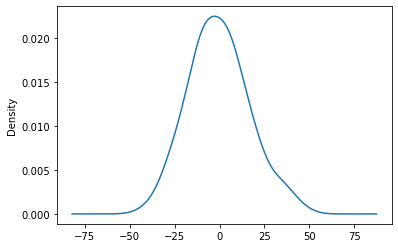

In [85]:
model_Arima_fit.resid.plot(kind='kde')

In [86]:
test_data['Predicted_ARIMA']=pred

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


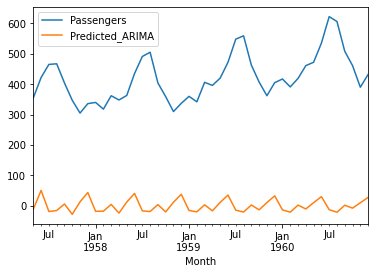

In [88]:
test_data[['Passengers','Predicted_ARIMA']].plot()

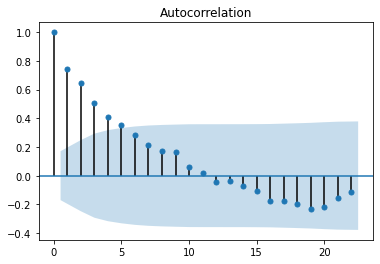

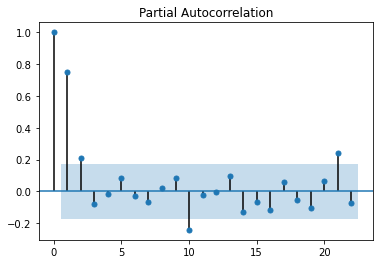

In [89]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [91]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [93]:
model_SARIMA=SARIMAX(train_data['Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [94]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [95]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  100
Model:             SARIMAX(3, 0, 5)x(0, 1, 0, 12)   Log Likelihood                -321.797
Date:                            Sat, 09 Sep 2023   AIC                            661.594
Time:                                    16:35:42   BIC                            683.890
Sample:                                01-01-1949   HQIC                           670.576
                                     - 04-01-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1320      0.203     -0.649      0.516      -0.530       0.266
ar.L2          0.1382      0.208      0.663      0.507      -0.270       0.546
ar.L3          0.9610      0.202      4.765      0.000       0.566       1.356
ma.L1          0.8566      0.209      4.107      0.000       0.448       1.265
ma.L2          0.7627      0.260      2.938      0.003       0.254       1.272
ma.L3         -0.4458      0.163     -2.735      0.006      -0.765      -0.126
ma.L4         -0.2661      0.151     -1.760      0.078      -0.563       0.030
ma.L5         -0.2975      0.130     -2.291      0.022      -0.552      -0.043
sigma2        83.6641     13.614      6.145      0.000      56.980     110.348
===================================================================================
Ljung-Box (Q):                       28.80   Jarque-Bera (JB):                 2.71
Prob(Q):                              0.91   Prob(JB):                         0.26
Heteroskedasticity (H):               1.42   Skew:                             0.43
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_data.tail()

In [96]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1957-05-01 00:00:00
1960-12-01 00:00:00


In [97]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,5,1),end=datetime(1960,12,1))
residuals=test_data['Passengers']-pred_Sarima

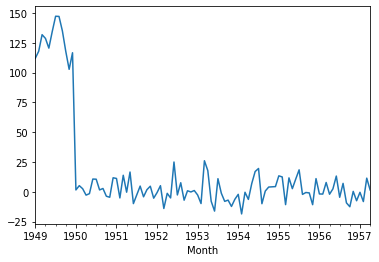

In [98]:
model_SARIMA_fit.resid.plot()

In [ ]:
model_SARIMA_fit.resid.plot(kind='kde')

In [99]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Nasir Hussain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_data

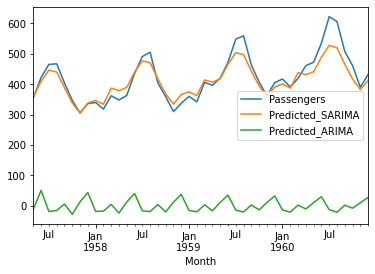

In [101]:
test_data[['Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()